In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import io as sio
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#sbt_effects = ((1,2),(1,5),(2,5),(3,1),(3,2),(6,1),(6,5))
sbt_effects = ((3,1),(3,2))

In [4]:
base_path = '/data1/guilimin/data/abide/HBM2016/sc7/full_maybe/'
w_tmp = 'sbt_weights_net_{}.csv'
m_path = '/data1/guilimin/data/abide/pheno/sc7/model_full_maybe_sc7.csv'
fig_path = '/home/surchs/GDrive/PhD/Conferences/MIICIA2016/Figures'

In [5]:
# Model
model = pd.read_csv(m_path)

In [6]:
model.DX_GROUP.replace({1:'Patient', 2:'Control'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


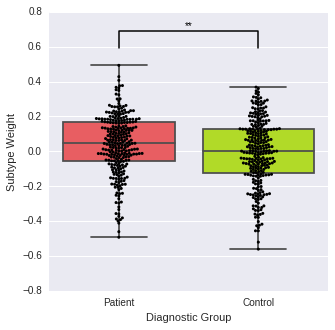

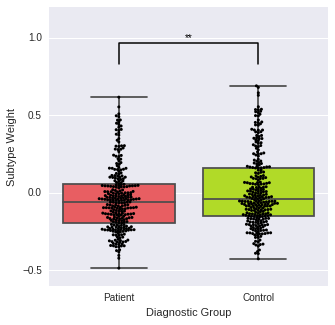

In [7]:
for eff in sbt_effects:
    network, subtype = eff
    sbt_name = 'sub{}'.format(subtype)
    weights = pd.read_csv(os.path.join(base_path, w_tmp.format(network)))
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    weights.columns = weights.columns.str.strip(' ')
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')

    f = plt.figure(figsize=(5,5))
    ax = f.add_subplot(1,1,1)
    tmp = sb.boxplot(x="DX_GROUP", y=sbt_name, data=merged, whis=np.inf, ax=ax, palette = sb.xkcd_palette(["light red", "chartreuse"]))
    #tmp = sb.violinplot(x="DX_GROUP", y=sbt_name, data=merged, inner=None, ax=ax)
    tmp = sb.swarmplot(x="DX_GROUP", y=sbt_name, data=merged, ax=ax, color='black', edgecolor='white', size=3)
    ax.set_ylabel('Subtype Weight')
    ax.set_xlabel('Diagnostic Group')
    
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    maxval = merged[sbt_name].max()
    y, h, col = maxval + maxval*0.2, maxval*0.2, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)
    
    
    fig_name = 'sig_effect_sbt{}_net{}.png'.format(subtype, network)
    f.savefig(os.path.join(fig_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)

In [8]:
sbt_effects = ((3,3),(3,4),(3,5))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


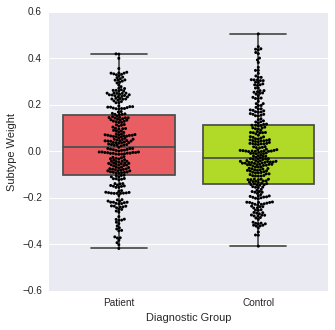

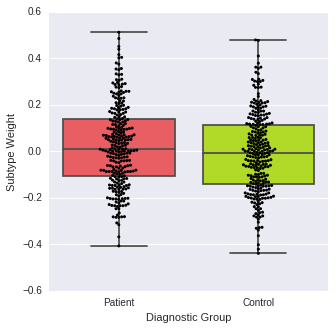

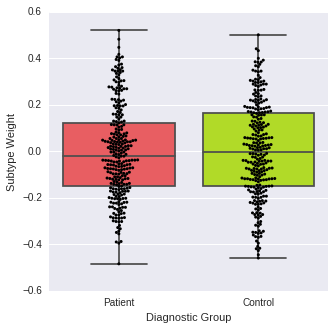

In [10]:
for eff in sbt_effects:
    network, subtype = eff
    sbt_name = 'sub{}'.format(subtype)
    weights = pd.read_csv(os.path.join(base_path, w_tmp.format(network)))
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    weights.columns = weights.columns.str.strip(' ')
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    merged = pd.merge(model, weights, on='SUB_ID', how='inner')

    f = plt.figure(figsize=(5,5))
    ax = f.add_subplot(1,1,1)
    tmp = sb.boxplot(x="DX_GROUP", y=sbt_name, data=merged, whis=np.inf, ax=ax, palette = sb.xkcd_palette(["light red", "chartreuse"]))
    #tmp = sb.violinplot(x="DX_GROUP", y=sbt_name, data=merged, inner=None, ax=ax)
    tmp = sb.swarmplot(x="DX_GROUP", y=sbt_name, data=merged, ax=ax, color='black', edgecolor='white', size=3)
    ax.set_ylabel('Subtype Weight')
    ax.set_xlabel('Diagnostic Group')
    
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    maxval = merged[sbt_name].max()
    y, h, col = maxval + maxval*0.2, maxval*0.2, 'k'
    #ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    #ax.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col)
    
    
    fig_name = 'nonsig_effect_sbt{}_net{}.png'.format(subtype, network)
    f.savefig(os.path.join(fig_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)